#### https://www.w3cschool.cn/python/

# 第一步，会发起网络请求

## 1.1 熟悉requests的基本应用

In [48]:
import requests

# 搜索请求网址

_url = 'http://www.baidu.com/s?wd=星期天' 

r = requests.get(_url)
        
print r

<Response [200]>


In [49]:
print help(r)

Help on Response in module requests.models object:

class Response(__builtin__.object)
 |  The :class:`Response <Response>` object, which contains a
 |  server's response to an HTTP request.
 |  
 |  Methods defined here:
 |  
 |  __bool__(self)
 |      Returns True if :attr:`status_code` is less than 400.
 |      
 |      This attribute checks if the status code of the response is between
 |      400 and 600 to see if there was a client error or a server error. If
 |      the status code, is between 200 and 400, this will return True. This
 |      is **not** a check to see if the response code is ``200 OK``.
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, *args)
 |  
 |  __getstate__(self)
 |  
 |  __init__(self)
 |  
 |  __iter__(self)
 |      Allows you to use a response as an iterator.
 |  
 |  __nonzero__(self)
 |      Returns True if :attr:`status_code` is less than 400.
 |      
 |      This attribute checks if the status code of the response is between
 |      400 and 600 to s

In [50]:
print r.__attrs__

['_content', 'status_code', 'headers', 'url', 'history', 'encoding', 'reason', 'cookies', 'elapsed', 'request']


### http://www.python-requests.org/en/master/user/quickstart/#response-content

## 1.2 把请求封装成函数，以适合搜索任意内容

### -------------------------------------
### 如何编写函数？？


def 函数名 ( 变量 ) :
    
    设定规则，计算结果
    
    return 结果


### -------------------------------------

### 动手写一个统计段落字数的函数
### -----------------------------------------
len() 方法返回对象（字符、列表、元组等）长度或项目个数。

Python的元组与列表类似，不同之处在于元组的元素不能修改。
元组使用小括号，列表使用方括号。


In [5]:
print len('120304adbffejoijgojoijoij')
print len([1,2,3,4,5])

tup1 = ('physics', 'chemistry', 1997, 2000);
print len(tup1)

25
5
4


### -----------------------------------------
## 小练习----------
大家动手做个小练习

### 长度大于10，或者等于0，返回False，其余返回True

In [6]:
def countStr(str):
    ln=len(str)
    return ln

countStr('iwoeijfowjoefjwiejfrur44')

24

### 如何编写条件语句

if 条件1 or 条件2 :
    
    设定规则A，计算结果A
    
    return 结果A

else :
    
    设定规则B，计算结果B
    
    return 结果B


In [11]:
if len('0994121212121212') >10 or len('0994121212121212') ==0 :
    print False
else :
    print True

False


## 1.3 编写我们的请求函数

In [28]:
import requests

# 搜索请求网址

_url = 'http://www.baidu.com/s?wd='  

def page(word):
    
    r = requests.get(_url + word)
    
    # 请求错误（不是200）处理
    
    print r
    
    if r.status_code == 200:
        
        return r.text
    
    else:
        
        print(r.status_code)
        
        return False


## 1.4 测试下编写的函数

### 测试下page

In [44]:
page('中文')

u'<!DOCTYPE html>\n<!--STATUS OK-->\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\n\n\n<html>\n\t<head>\n\t\t\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\t<meta http-equiv="content-type" content="text/html;charset=utf-8">\n\t\t<meta content="always" name="referrer">\n        <meta name="theme-color" content="#2932e1">\n        <link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />\n        <link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg">\n        <link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="\u767e\u5ea6\u641c\u7d22" />\n\t\t\n\t\t\n<title>\u4e2d\u6587_\u767e\u5ea6\u641c\u7d22</title>\n\n\t\t\n\n\t\t\n<style 

# 第二步，处理抓取下来的html页面
## 2.1 使用beautifulsoup库
https://www.crummy.com/software/BeautifulSoup/bs4/doc/index.zh.html

会安装/使用python相关开源库

初始化---》通过id查找，或class/html标签查找---》获取标签内正文

### BeautifulSoup()
### find
### find_all
### get_text


In [15]:
from bs4 import BeautifulSoup

html="""
<html><head><title>标题党</title></head>
<body>
<p class="title"><b>我是标题党</b></p>

<p class="story">欢迎关注微信公众号Design-AI-Lab,感谢活动主办方
<a href="http://www.xuehuiget.com.cn" class="company" id="get">学会Get</a>，助力用户get一项技能</p>

<p class="story">... ...</p>
"""

sp = BeautifulSoup(html)

print sp.prettify()
print '----------'

get=sp.find(id="get")

print get

print '----------'

print sp.find_all('a', class_='company')[0]

print '----------'
print sp.find(class_='story').get_text()

<html>
 <head>
  <title>
   标题党
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    我是标题党
   </b>
  </p>
  <p class="story">
   欢迎关注微信公众号Design-AI-Lab,感谢活动主办方
   <a class="company" href="http://www.xuehuiget.com.cn" id="get">
    学会Get
   </a>
   ，助力用户get一项技能
  </p>
  <p class="story">
   ... ...
  </p>
 </body>
</html>
----------
<a class="company" href="http://www.xuehuiget.com.cn" id="get">学会Get</a>
----------
<a class="company" href="http://www.xuehuiget.com.cn" id="get">学会Get</a>
----------
欢迎关注微信公众号Design-AI-Lab,感谢活动主办方
学会Get，助力用户get一项技能


## 2.2 练习，提取任意网页的标题及副标题



### ---------------------------------


## 2.3 编写一个提取百度搜索结果的函数

In [16]:
import requests
from bs4 import BeautifulSoup

def init(html):
    # 初始化
    #print help(BeautifulSoup)
    soup = BeautifulSoup(html)
    results = []
    
       # print '-----------'
       # print soup
    
    # 获取结果来源
    result_set = soup.find(id='content_left')  # 结果全显示在页面左边
    result_set = result_set.find_all('div', class_='c-container')  # 结果class固定，其余为硬广

    for i in range(len(result_set)):  # 因为要index所以就用range来
        result = result_set[i]  # 其实就是result_div

        abstract = __get_abstract(result)
           
        results.append(abstract)
    
    return results

# 获取abstract
def __get_abstract(result_div):
    if 'result-op' not in result_div['class']:  # 不是软广
        r_from = result_div.find(class_='c-abstract')
        if not r_from:
            return u'-'
        for em in r_from.find_all('em'):  # 移除abstract中的em标签
            em.unwrap()
        #print 0
       # print r_from.get_text()
        return r_from.get_text()
    else:
        return u'-'  # 其实是因为太麻烦


    

ImportError: No module named requests

# 第三步，合并 第一 及 第二 步的内容，输入查找内容，返回百度搜索的正文结果

In [40]:
def search(keyword):
    _page = page(keyword)
    results = init(_page)
    
    return results


-----------
<!DOCTYPE html>

<!--STATUS OK-->
<html>
<head>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<meta content="always" name="referrer"/>
<meta content="#2932e1" name="theme-color"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg" mask="" rel="icon" sizes="any"/>
<link href="/content-search.xml" rel="search" title="百度搜索" type="application/opensearchdescription+xml">
<title>黄梅戏_百度搜索</title>
<style data-for="result" id="css_newi_result" type="text/css">body{color:#333;background:#fff;padding:6px 0 0;margin:0;position:relative;min-width:900px}
body,th,td,.p1,.p2{font-family:arial}
p,form,ol,ul,li,dl,dt,dd,h3{margin:0;padding:0;list-style:none}
input{padding-top:0;padding-bottom:0;-moz-box-sizing:border-box;-webkit-box-sizing:border-box;box-sizing:border-box}
table,img{border:0}
td{font-size:9pt;line-h
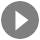
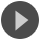
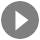
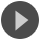
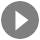
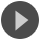

/usr/local/lib/python2.7/dist-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /usr/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html.parser")

  markup_type=markup_type))


[u'-',
 u'\u5305\u542b\u9ec4\u6885\u620f\u65b0\u95fb,\u9ec4\u6885\u620f\u4e0b\u8f7d,\u9ec4\u6885\u620f\u89c6\u9891,\u540d\u5bb6\u540d\u6bb5,\u9ec4\u6885\u620f\u8d44\u6599,\u9ec4\u6885\u620f\u94c3\u58f0,\u9ec4\u6885\u620f\u66f2\u8c31\u7b49\u7efc\u5408\u6027\u620f\u66f2\u8d44\u8baf\u7f51\u7ad9',
 u'\u620f\u66f2\u5927\u5168\u9ec4\u6885\u620f\u680f\u76ee\u4e3a\u4f60\u63d0\u4f9b2015\u6700\u65b0\u9ec4\u6885\u620f\u89c6\u9891\u5927\u5168,\u9ec4\u6885\u620f\u6b4c\u66f2,\u9ec4\u6885\u620f\u7535\u5f71\u4ee5\u53ca\u9ec4\u6885\u620f\u5973\u9a78\u9a6c,\u9ec4\u6885\u620f\u5929\u4ed9\u914d\u7b49\u9ad8\u6e05\u89c6\u9891.\u60a8\u53ef\u4ee5\u5728\u7ebf\u89c2\u770b\u9ec4\u6885\u620f\u5927\u5168100\u96c6\u5e76\u63d0\u4f9b\u9ad8\u6e05mp3\u4e0b\u8f7d\u3002',
 u'-',
 u'\u9ec4\u6885\u620f\u7f51\u63d0\u4f9b\u514d\u8d39,\u9ec4\u6885\u620fmp3,\u9ec4\u6885\u620f\u89c6\u9891,\u9ec4\u6885\u620f\u540d\u6bb5\u5728\u7ebf\u89c2\u770b\u3002... \u9ec4\u6885\u620f\u9009\u6bb5\u4e32\u70e7 \u4e3b\u6f14:\u6797\u871c\u871c\u3

In [41]:
search('黄梅戏')

# 第四步，自动答题方案1

In [24]:
question=u'下列哪个戏种被称为中国的百戏之祖'
answers=[u'黄梅戏',u'越剧',u'昆曲']

### 1 搜索问题，简单的统计答案出现在搜索结果中的次数，次数最高者推荐为答案

In [26]:
def guessAnswer(question,answers):
    _res=search(question)
    #print _res
    _strs=''.join(_res)
    _guess={}
    
    for ans in answers:
        _guess[ans]=_strs.count(ans)
        print ans,_strs.count(ans)
    
    return _guess


-----------
<!DOCTYPE html>

<!--STATUS OK-->
<html>
<head>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<meta content="always" name="referrer"/>
<meta content="#2932e1" name="theme-color"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg" mask="" rel="icon" sizes="any"/>
<link href="/content-search.xml" rel="search" title="百度搜索" type="application/opensearchdescription+xml">
<title>撒贝宁的姐妹是_百度搜索</title>
<style data-for="result" id="css_newi_result" type="text/css">body{color:#333;background:#fff;padding:6px 0 0;margin:0;position:relative;min-width:900px}
body,th,td,.p1,.p2{font-family:arial}
p,form,ol,ul,li,dl,dt,dd,h3{margin:0;padding:0;list-style:none}
input{padding-top:0;padding-bottom:0;-moz-box-sizing:border-box;-webkit-box-sizing:border-box;box-sizing:border-box}
table,img{border:0}
td{font-size:9pt;li
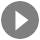
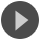
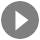
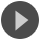
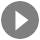
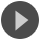
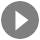
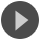

{u'\u4efb\u96ea': 0,
 u'\u6492\u8d1d\u5a1c': 3,
 u'\u674e\u601d\u601d': 0,
 u'\u6d82\u7ecf\u7eac': 0}

In [43]:
guessAnswer(question,answers)

## 测试另一组题目

In [42]:
question=u'撒贝宁的姐妹是'
answers=[u'涂经纬',u'撒贝娜',u'任雪',u'李思思']
guessAnswer(question,answers)

### 2 对于答案比较长的，采用分词处理后，再进行答案统计

In [101]:
question=u'如果我们长期在很高的氧浓度下呼吸，会？'
answers=[u'A 觉得轻飘飘的',u'B 脑中毒，精神混乱，记忆丧失',u'C 感觉很舒服，增强免疫力']

In [103]:
_res=search(question)
_strs=''.join(_res)

_ans_n={}

for index in range(len(answers)):
    seg_list=jc(answers[index],cut_all=True)
    
    #print seg_list
    for s in seg_list:
        _c=_strs.count(s)
        _ans_n[index]=_ans_n.get(index,0)+_c



for index in range(len(answers)):
    print answers[index],_ans_n[index]


    

A 觉得轻飘飘的 1015
B 脑中毒，精神混乱，记忆丧失 4908
C 感觉很舒服，增强免疫力 2956


### 2.1 封装成函数

In [105]:
def guessAnswer2(question,answers):
    _res=search(question)
    _strs=''.join(_res)

    _ans_n={}

    for index in range(len(answers)):
        seg_list=jc(answers[index],cut_all=True)

        #print seg_list
        for s in seg_list:
            _c=_strs.count(s)
            _ans_n[index]=_ans_n.get(index,0)+_c



    for index in range(len(answers)):
        print answers[index],_ans_n[index]


### 测试下

In [106]:
question=u'西游记里《真假美猴王》一回里，最后两只猴子去到如来那里，如来为了辨别真假想了一个办法，他拿出一个桃子和一个榴莲任其选择，结果一个选了桃子，一个选了榴莲，请问谁才是真的孙悟空？为什么？'
answers=[u'A、选桃子的',u'B、选榴莲的']
guessAnswer2(question,answers)

A、选桃子的 1029
B、选榴莲的 1027


### 再测试下

In [108]:
question=u'在工业上，通常用电解盐溶液的方法来制取氯气，而最广泛的不免是"氯碱工业"。请问，氯碱工业中，氯指的是氯气，碱指的是什么呢？'
answers=[u'A、熟碱水',u'B、纯碱',u'C、老碱',u'D、烧碱']
guessAnswer2(question,answers)

A、熟碱水 852
B、纯碱 852
C、老碱 884
D、烧碱 856


有没有更科学的方法/算法，来求得最佳答案？

# --------------------------------------
# --------------------------------------
## 3 用文本关联相似度分析，采用PMI

对于答题这样的项目，首先一个问题，然后有三个答案可以选择，能不能通过分别统计问题与三个答案的关联度来选择出正确的答案，由于数据采集是来自百度的，可能会受到部分广告数据的影响，但是在集合相当大的情况下，关联度还是会呈现正相关。

假设题目是： 

*中国历史上著名的科举制度开始于那个朝代？*
- 汉朝
- 唐朝
- 隋朝

我们先用百度分别搜索`汉朝`，`唐朝`，`隋朝`，得到如下数据：

朝代 | 搜索出的数量（来自百度为您找到相关结果约）
---- | ------------------------------------------
汉朝 | 18600000
唐朝 | 27000000
隋朝 | 14600000

然后我们在用`题目` + 答案的方式，搜索示例：

`中国历史上著名的科举制度开始于那个朝代？ 汉朝` 得到三次的搜索结果：

 关键字  | 搜索出的数量（来自百度为您找到相关结果约）
-------- | ------------------------------------------
Q + 汉朝 | 200000
Q + 唐朝 | 274000
Q + 隋朝 | 220000

关联度计算方式：

``` shell
K = count(Q&A) / (count(Q) * count(A))
```

关联度如下：

答案 | 关联度
---- | ------
汉朝 | 0.0273
唐朝 | 0.0258
隋朝 | 0.0383


In [120]:
question=u'中国历史上著名的科举制度开始于那个朝代'
answers=[u'汉朝',u'唐朝',u'隋朝']
guessAnswer2(question,answers)

汉朝 1
唐朝 6
隋朝 7


In [150]:
question=u'氯碱工业中，氯指的是氯气，碱指的是什么呢？'
answers=[u'A、熟碱水',u'B、纯碱',u'C、老碱',u'D、烧碱']

In [156]:
question=u'撒贝宁的姐妹是'
answers=[u'涂经纬',u'撒贝娜',u'任雪',u'李思思']

## PMI-01 从百度搜索结果页面中获取搜索到的结果数量

## 问题---如何从页面中提取出 搜索结果？？？
chrome开发者工具

### ----------------------------

In [146]:
import requests
from bs4 import BeautifulSoup

def get_count(html):
    # 初始化
    soup = BeautifulSoup(html)
    nums =__get_nums(soup)      
          
    return nums

# 获取搜索结果的数量
def __get_nums(result_div):
    _r=result_div.find(class_='nums').get_text()
    return _r
    


## PMI-02 封装搜索函数，获取搜索结果

In [147]:
def search_countBy(keyword):
    _page = page(keyword)
    results = get_count(_page)
    
    return results


## PMI-03 第搜索结果进行加工处理

In [123]:
_p=search_countBy(question)

In [126]:
##从字符串提取数字

import re
 
string="A1.45，b5，6.45，8.82"

print re.findall(r"\d+\.?\d*",string)

print ''.join(re.findall(r"\d+\.?\d*",_p))



['1.45', '5', '6.45', '8.82']
3930000


## 封装成专用于从字符串中提取数字的函数

In [148]:
import re
def getNumFromStr(_str):
    _numstr=''.join(re.findall(r"\d+\.?\d*",_str))
    _numstr=_numstr.encode("utf-8")
    _num=float(_numstr)
    return _num

## PMI-04 按照PMI的公式，编写函数，计算结果

In [157]:
As={}

QAs={}

Q=getNumFromStr(search_countBy(question))

for index in range(len(answers)):
    _strs=question+answers[index]
    _p=search_countBy(_strs)
    _n=getNumFromStr(_p)
    QAs[index]=_n

for index in range(len(answers)):
    _strs=answers[index]
    _p=search_countBy(_strs)
    _n=getNumFromStr(_p)
    As[index]=_n
    
print As,QAs

for index in range(len(QAs)):
    _K=QAs[index]/(Q*As[index])
    print _K

{0: 292000.0, 1: 33700.0, 2: 1740000.0, 3: 5400000.0} {0: 5800.0, 1: 19100.0, 2: 3.0, 3: 22200.0}
2.18274875809e-08
6.22819317181e-07
1.89465706707e-12
4.5177045177e-09


In [158]:
#float(QAs[0])/float(Q*As[0])
#int()
import math

print math.log( 2.18274875809e-08 )
print math.log( 6.22819317181e-07 )
print math.log( 1.89465706707e-12 )
print math.log( 4.5177045177e-09 )

-17.6400957632
-14.2890093808
-26.991983261
-19.2152618222


# END ------------------------
# 提问环节

In [20]:
from  jieba import lcut as jc
import jieba.analyse as ja
# 这里使用jieba的textrank提取出_topK个关键词及其比重,默认参数的写法如下 

def getKeywords(_txts,_topK=1000):
      
    _res = ja.textrank(_txts, topK=_topK, withWeight=True)
    
    
    print(_res)

    # 生成关键词比重字典
    _keywords = dict()
    for i in _res:
        _k=i[0]
        _keywords[_k] = i[1]

    printJson(_keywords)
    
    return _keywords



In [13]:
print type(res)
_txts=''.join(res)
print type(_txts)

<type 'list'>
<type 'unicode'>


In [38]:
str2=u'越剧黄梅戏昆曲黄梅戏'
print str2.count(u'黄梅戏')

2


In [19]:
import json
def printJson(ky):
    print(json.dumps(ky,ensure_ascii=False, encoding='UTF-8')) 

In [35]:
# 统计词频
str1 = u"中文 啊 是 中文 把 哈哈 真的是中文 中文"
print "要统计的句子:"
print str1
print '-----------------------------------'

# 按照空格把句子切分成List
wordList1 = str1.split(None)
print wordList1
# strip any punctuation marks and build modified word list
# start with an empty list
wordList2 = []
for word1 in wordList1:
  # 每个词的最后一个字符
  lastchar = word1[-1:]
    
  print lastchar
        
  # 去除标点符号
  if lastchar in [",", ".", "!", "?", ";"]:
    word2 = word1.rstrip(lastchar)
  else:
    word2 = word1
    
  # 处理后的List2
  wordList2.append(word2.lower())
    
print "处理后的句子:"
print wordList2
print '-----------------------------------'


# 创建一个统计词频的字典
freqD2 = {}

for word in wordList2:
  freqD2[word] = freqD2.get(word, 0) + 1

# 获取关键词，并且排序
keyList = freqD2.keys()
keyList.sort()
print "词频统计结果如下:"
for key in keyList:
 print "%-10s %d" % (key, freqD2[key])

要统计的句子:
中文 啊 是 中文 把 哈哈 真的是中文 中文
-----------------------------------
[u'\u4e2d\u6587', u'\u554a', u'\u662f', u'\u4e2d\u6587', u'\u628a', u'\u54c8\u54c8', u'\u771f\u7684\u662f\u4e2d\u6587', u'\u4e2d\u6587']
文
啊
是
文
把
哈
文
文
处理后的句子:
[u'\u4e2d\u6587', u'\u554a', u'\u662f', u'\u4e2d\u6587', u'\u628a', u'\u54c8\u54c8', u'\u771f\u7684\u662f\u4e2d\u6587', u'\u4e2d\u6587']
-----------------------------------
词频统计结果如下:
中文         3
哈哈         1
啊          1
把          1
是          1
真的是中文      1


In [34]:
p={ 8:2,
    0:1,
    1:2
}

print p.get(0,2)
print p.get(3,9)

print p.keys()
k=p.keys()
print k
k.sort()
print k

1
9
[8, 0, 1]
[8, 0, 1]
[0, 1, 8]


In [ ]:
def count(texts):
    _num=len(texts)
    return _num


#unicode格式
print len('哈哈'.decode('utf-8')) 

#utf-8格式
print len('哈哈') 

#unicode格式
print len(u'哈哈') 

count(u'今天是星期几')

In [14]:
#print printJson(res)
#_txts=''.join(res)
#_kys=getKeywords(_txts,100)

[(u'\u4e2d\u56fd', 1.0), (u'\u767e\u620f', 0.8827857889238552), (u'\u79f0\u4e3a', 0.8291497982774364), (u'\u821e\u8e48', 0.5676589617532118), (u'\u5267\u79cd', 0.47083398897479467), (u'\u6606\u66f2', 0.45634161803502565), (u'\u620f\u66f2', 0.4512751943350847), (u'\u4e3a\u4e3b', 0.3312752803425379), (u'\u620f\u5267', 0.3223009194137544), (u'\u6606\u5c71', 0.30258538956543507), (u'\u8868\u6f14', 0.29873761641016217), (u'\u6587\u5b66\u53f2', 0.28407592872864273), (u'\u827a\u672f', 0.2821143319951763), (u'\u4f53\u7cfb', 0.28073152466487644), (u'\u4eac\u5267', 0.26842595084631726), (u'\u7269\u8d28', 0.26838516933595064), (u'\u6587\u5316\u9057\u4ea7', 0.26747106338531107), (u'\u620f\u79cd', 0.24659667542422972), (u'\u5370\u5ea6', 0.2353710253501502), (u'\u6709\u5173', 0.2263407259956725), (u'\u7ea2\u5305', 0.2263407259956725), (u'\u6d3b\u5316\u77f3', 0.2262766351714662), (u'\u6c5f\u5357', 0.2262766351714662), (u'\u6587\u5316', 0.22529885543214437), (u'\u73b0\u91d1', 0.22529885543214437), (u'

In [66]:
count = 0

strs=[]

print res

for r in res:
    
    #print('{0} {1} {2} {3} {4}'.format(result.index, result.title, result.abstract, result.show_url, result.url))  # 此处应有格式化输出
    
    a=(r.abstract)
    #strs.append(a)
   
    #a=a.encode("utf-8")
    print type(a)
    print 
    if isinstance(a,str):
        print 'efe'
       # a=a.encode('utf-8')
        
        strs.append(a)
    else:
        
        strs.append(a)
    
  
       # print('{0}'.format(a))   
    #print('{0}'.format(r.abstract))  # 此处应有格式化输出


print type(strs)

sss=str(strs)

#print sss

getKeywords(sss)
   
     

[<__main__.Result object at 0x7f2dcb7609d0>, <__main__.Result object at 0x7f2dcb7e12d0>, <__main__.Result object at 0x7f2dcb7c7e90>, <__main__.Result object at 0x7f2dcb7e1f50>, <__main__.Result object at 0x7f2dcb7f6310>, <__main__.Result object at 0x7f2dcb7f6850>, <__main__.Result object at 0x7f2dcb7f6c50>, <__main__.Result object at 0x7f2dcb7f6fd0>, <__main__.Result object at 0x7f2dcb78f590>, <__main__.Result object at 0x7f2dcb78f3d0>]
<type 'str'>

efe
<type 'unicode'>

<type 'unicode'>

<type 'unicode'>

<type 'unicode'>

<type 'unicode'>

<type 'unicode'>

<type 'unicode'>

<type 'unicode'>

<type 'str'>

efe
<type 'list'>
[]
{}


{}

In [42]:
print('{0}'.format('hello','world'))

In [43]:
a = '\u64cd\u4f5c\u7cfb\u7edf'

print a.decode('unicode-escape').encode('utf-8')

print type(a.decode('unicode-escape').encode('utf-8'))